# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План работы:
1. Выделить необходимые столбцы
2. Заполнить отсутствующие значения
3. Заменить типы данных
4. Добавить необходимые столбцы в таблицу
5. Добавить гистограммы
6. Сводные графики, корреляции
7. Топ-10 населенных  пунктов
8. Квартиры в центре
9. Общий вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

22 колонки - 22 параметра квартиры, очень много.<br/>
Многие столбцы нам не нужны для выполнения поставленных задач. Есть идея.<br/>
Соберем свою таблицу! С блэк-джеком, ценой и без ненужных балконов!<br/>
Введем новую таблицу, с необходимыми столбцами.

### Шаг 2. Предобработка данных

In [2]:
visual_data = data[['locality_name', 'last_price', 'rooms', 'total_area', 'living_area', 'kitchen_area', 'ceiling_height',
                     'floor', 'floors_total','cityCenters_nearest', 'days_exposition', 'first_day_exposition']]
visual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 12 columns):
locality_name           23650 non-null object
last_price              23699 non-null float64
rooms                   23699 non-null int64
total_area              23699 non-null float64
living_area             21796 non-null float64
kitchen_area            21421 non-null float64
ceiling_height          14504 non-null float64
floor                   23699 non-null int64
floors_total            23613 non-null float64
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
first_day_exposition    23699 non-null object
dtypes: float64(8), int64(2), object(2)
memory usage: 2.2+ MB


In [3]:
visual_data.head(10)

,locality_name,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height,floor,floors_total,cityCenters_nearest,days_exposition,first_day_exposition
0,Санкт-Петербург,13000000.0,3,108.00,51.00,25.00,2.70,8,16.0,16028.0,NaN,2019-03-07T00:00:00
1,посёлок Шушары,3350000.0,1,40.40,18.60,11.00,NaN,1,11.0,18603.0,81.0,2018-12-04T00:00:00
2,Санкт-Петербург,5196000.0,2,56.00,34.30,8.30,NaN,4,5.0,13933.0,558.0,2015-08-20T00:00:00
3,Санкт-Петербург,64900000.0,3,159.00,NaN,NaN,NaN,9,14.0,6800.0,424.0,2015-07-24T00:00:00
4,Санкт-Петербург,10000000.0,2,100.00,32.00,41.00,3.03,13,14.0,8098.0,121.0,2018-06-19T00:00:00
5,городской посёлок Янино-1,2890000.0,1,30.40,14.40,9.10,NaN,5,12.0,NaN,55.0,2018-09-10T00:00:00
6,посёлок Парголово,3700000.0,1,37.30,10.60,14.40,NaN,6,26.0,19143.0,155.0,2017-11-02T00:00:00
7,Санкт-Петербург,7915000.0,2,71.60,NaN,18.90,NaN,22,24.0,11634.0,NaN,2019-04-18T00:00:00
8,посёлок Мурино,2900000.0,1,33.16,15.43,8.81,NaN,26,27.0,NaN,189.0,2018-05-23T00:00:00
9,Санкт-Петербург,5400000.0,3,61.00,43.60,6.50,2.50,7,9.0,15008.0,289.0,2017-02-26T00:00:00


In [4]:
visual_data.duplicated().sum()

0

0 дубликатов!

In [5]:
visual_data.isna().sum()

locality_name             49
last_price                 0
rooms                      0
total_area                 0
living_area             1903
kitchen_area            2278
ceiling_height          9195
floor                      0
floors_total              86
cityCenters_nearest     5519
days_exposition         3181
first_day_exposition       0
dtype: int64

#### Пропуски

Обнаружили пропуски в следующих столбцах:
1. locality_name. 49 значений. Населенный пункт, мало отсутствующих значений, можно проигнорировать.
2. living_area. 1903 значения. Жилая площадь - важный показатель. Есть предположение, что этот параметр очень сильно зависит от общей площади, надо обязательно проверить! Дополнительно проверим, как сильно зависит жилая площадь от стоимости квартиры и количества комнат. 
3. kitchen_area. 2278 значений. Площадь кухни можно заменить процентным показателем от общей площади, перед этим проверив корреляцию, конечно.
4. ceiling_height. 9195 значений. Высота потолков может быть восстановлена. Попробуем найти связь с этажностью.
5. floors_total. 86 значений. Оставим без изменений.
6. cityCenters_nearest. 5519 значений. Оставим без изменений. 
7. days_exposition. 3181 значение. Оставим без изменений, но попробуем установить причину пропусков. Возможно, количество дней публикации не установлено, потому что эти квартиры ещё не проданы. 

Необходимо сначала определить **все** созависимости на начальных данных и только после этого вносить корректировки.

#### Выявление созависимостей

1. Жилая площадь:

In [6]:
visual_data['living_area'].corr(visual_data['total_area'])

0.9395373338721491

In [7]:
visual_data['living_area'].corr(visual_data['rooms'])

0.8459774567888746

In [8]:
visual_data['living_area'].corr(visual_data['last_price'])

0.5664915336952648

Наши предположения подтвердились, ура!

Больше всего жилая площадь зависит от общей площади, а также довольно сильно зависит от количества комнат.

Существенно ниже зависимость от цены, но это относительно лидирующих корреляций, в целом зависимость тоже существенная.

In [9]:
data['living_area'].isna().sum()

1903

In [10]:
living_area_ratio = (data['living_area'] / data['total_area']).mean()

In [11]:
data['living_area'].mean()

34.457852427601395

In [12]:
data['living_area'].median()

30.0

Напишем функцию, для замены отсутствующих значений в колонке жилой площади, в зависимости от общей площади:

In [13]:
import numpy as np

def fill_na_living(row):
    if np.isnan(row['living_area']):
        return row['total_area'] * living_area_ratio
    return row['living_area']

In [14]:
data['living_area'] = data.apply(fill_na_living, axis=1)

In [15]:
data['living_area'].isna().sum()

0

In [16]:
data['living_area'].mean()

34.562480463165144

In [17]:
data['living_area'].median()

30.0

0 отсутсвующих значений, средняя и медиана почти не изменились. Можно себя поздравить!

2. Площадь кухни:

In [18]:
visual_data['kitchen_area'].corr(visual_data['total_area'])

0.6091211711198314

In [19]:
visual_data['kitchen_area'].corr(visual_data['living_area'])

0.42867430668441225

In [20]:
visual_data['kitchen_area'].corr(visual_data['last_price'])

0.5198690130216387

In [21]:
visual_data['kitchen_area'].corr(visual_data['rooms'])

0.26994485416385783

Наибольшую зависимость видим от общей площади, но достаточно ли её для замены?<br/>
Заменим отсутствующие значения согласно общей площади.

In [22]:
kitchen_area_ratio = (data['kitchen_area'] / data['total_area']).mean()

In [23]:
data['kitchen_area'].isna().sum()

2278

In [24]:
data['kitchen_area'].mean()

10.569807198543485

In [25]:
data['kitchen_area'].median()

9.1

In [26]:
import numpy as np

def fill_na_kitchen(row):
    if np.isnan(row['kitchen_area']):
        return row['total_area'] * kitchen_area_ratio
    return row['kitchen_area']

In [27]:
data['kitchen_area'] = data.apply(fill_na_kitchen, axis=1)

In [28]:
data['kitchen_area'].isna().sum()

0

In [29]:
data['kitchen_area'].mean()

10.57268265834249

In [30]:
data['kitchen_area'].median()

9.08

Средний и медианный показатель практически не изменились. Это успех!

3. Высота потолков

In [31]:
visual_data['ceiling_height'].corr(visual_data['floors_total'])

-0.028731894622727346

In [32]:
visual_data['ceiling_height'].corr(visual_data['floor'])

-0.011798251030463643

In [33]:
visual_data['ceiling_height'].corr(visual_data['total_area'])

0.0954904485236636

Зависимость отсутствует. 

Если заменить медианами по населенным пунктам, то можем получить сильно искаженную картину.<br/> Очень много населенных пунктов с малым количеством объявлений. 

Придется заменить высоту потолка медианным показателем.

In [34]:
ceiling_height_median = data['ceiling_height'].median()

In [35]:
data['ceiling_height'] = data['ceiling_height'].fillna(value=ceiling_height_median)

Высота потолка более 5метров кажется подозрительной.<br/> Посмотрим, какую часть составляют квартиры с высотой потолка более 5метров, и в случае небольшого показателя - избавимся от них.

In [36]:
(data['ceiling_height'] > 5).mean()

0.0015190514367694839

In [37]:
data.loc[data['ceiling_height'] > 5, 'ceiling_height'] = ceiling_height_median

#### Название населенного пункта

In [38]:
len(data['locality_name'].unique())

365

365 названий населенных пунктов. Что-то многовато...

In [39]:
visual_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Видим много вариантов написания названий одних и тех же населенных пунктов.

Нужно свести к одному регистру, заменить строку с названием 'nan', заменить отсутствующие значения и лемматизировать.

Посмотрим топ населенных пунктов по количеству объявлений:

In [40]:
data['locality_name'].value_counts().sort_values(ascending=False).head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Естественно, Спб на первом месте, добрую половину составляет. А сколько это "добрая половина"?

In [41]:
len(data.query('locality_name == "Санкт-Петербург"'))/len(data)

0.6633613232625849

66% всех квартир из выборки находятся в Санкт-Петербурге.<br/>
Интересно, изменится ли эта цифра, да и весь топ-10 после лемматизации?

#### Лемматизация

Импортируем всё, что может пригодиться:

In [42]:
from pymystem3 import Mystem
from collections import Counter
m = Mystem()

Напишем функцию для лемматизации:

In [43]:
def to_lemmas(row):
        lemmas = m.lemmatize(row)
        lemmas_string = ''.join(lemmas).replace('поселок', '').replace('коттеджный', '').replace(
            'деревня', '').replace('городской', '').replace('тип', '').replace('село', '').replace(
            'садовый', '').replace('товарищество', '').replace('садоводческий', '').replace(
            'некоммерческий', '').replace('при железнодорожный станция', '').replace('станция', '')
        
        return lemmas_string

Я не горжусь этим безобразием с реплейсами, но ничего лучше не придумал. :(

Добавляем новый столбец cо строками из лемм и применяем функцию to_lemmas:

In [44]:
data['locality_name'] = data['locality_name'].fillna(value='неизвестно')

In [45]:
data['lemmas_string'] = data['locality_name'].apply(to_lemmas)

In [46]:
data['lemmas_string'].value_counts().sort_values(ascending=False).head(10)

санкт-петербург\n    15721
 муриный\n             556
 шушар\n               440
всеволожск\n           398
пушкин\n               369
колпино\n              338
 парголовый\n          327
гатчина\n              307
 кудрово\n             299
выборг\n               237
Name: lemmas_string, dtype: int64

Изменение цифр наблюдаем только в Мурино, значит процент объявлений в Спб не изменился.

In [47]:
len(data['locality_name'].unique()) - len(data['lemmas_string'].unique())

41

Избавились от 41 дубля, а это более 10%, не плохо!

Поменяем тип данных с float на int в следующих столбцах:
last_price, floors_total, cityCenters_nearest, days_exposition

Ни в одном из этих значений нас не интересуют цифры после запятой.

In [48]:
data['last_price'] = data['last_price'].astype('int64')

In [49]:
data['floors_total'] = data['floors_total'].astype('Int64')

In [50]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('Int64')

In [51]:
data['days_exposition'] = data['days_exposition'].round(0).astype('Int64')

Изменим тип данных в столбце first_day_exposition.

In [52]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Посмотрим промежуток времени, за который мы имеем данные:

In [53]:
print(data['first_day_exposition'].min())
print(data['first_day_exposition'].max())

2014-11-27 00:00:00
2019-05-03 00:00:00


В нашей выборке данные более чем за 4 года.

### Шаг 3. Посчитайте и добавьте в таблицу

Добавим стоимость за квадратный метр в отдельный столбец:

In [54]:
data['price_one_square_meter'] = data['last_price'] / data['total_area']
data['price_one_square_meter'] = data['price_one_square_meter'].round(0).astype('int64')

Добавим столбец с днем недели когда было опубликовано объявление:

In [55]:
data['weekday_of_exposition'] = data['first_day_exposition'].dt.weekday

Напишем функцию, которая переведет бездушные цифры в приятные сердцу 'понедельники' и 'пятницы'.

In [56]:
def weekday_of_exposition(row):
    weekday = row
    if weekday == 0:
        return 'понедельник'
    if weekday == 1:
        return 'вторник'
    if weekday == 2:
        return 'среда'
    if weekday == 3:
        return 'четверг'
    if weekday == 4:
        return 'пятница'
    if weekday == 5:
        return 'суббота'
    if weekday == 6:
        return 'воскресенье'
    return 'неизвестно'

In [57]:
data['weekday_of_exposition'] = data['weekday_of_exposition'].apply(weekday_of_exposition)

Добавим ещё 2 колонки, месяц публикации и год публикации. 

In [58]:
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Напишем функцию, которая разложит наши квартиры по трём коробкам с этажами, варианты: первый, последний, другой.

In [59]:
def group_for_floor(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    try:
        if floor == 1:
            return 'первый'
    
        if floor == floors_total:
            return 'последний'
    
        return 'другой'
    except: 
        return 'информации недостаточно'
    


In [60]:
data['group_floor'] = data.apply(group_for_floor, axis=1)

Добавим столбцы стоотношения площадей: 
    1. жилой к общей
    2. кухни к общей

In [61]:
data['living_of_the_total'] = data['living_area'] / data['total_area']
data['kitchen_of_the_total'] = data['kitchen_area'] / data['total_area']

Добавим колонку расстояния до центра в километрах:

In [62]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Cформируем новую таблицу, отбросив выбросы.<br/>
Установим следующие параметры новой таблицы:

1. Общая площадь менее 300 квадратных метров, большая площадь встречается крайне редко.(не более 0.25% данных)

In [63]:
(data['total_area'] > 300).mean()

0.0025739482678594034

2. Стоимость более 700 тысяч и менее 70млн. (не более 0.61% данных)

In [64]:
(data['last_price'] < 700000).mean()

0.0029115152538081775

In [65]:
(data['last_price'] > 70000000).mean()

0.003206886366513355

3. Количество комнат не более 6. (не более 0.37% данных)

In [66]:
(data['rooms'] > 6).mean()

0.00379762859192371

4. Количество дней продажи установлено. (не более 13.42% данных)
Это большая потеря в данных, НО главным(а возможно, и единственным) показателем объективности того или иного 
предложения о продаже, является **покупка**. 
Пока квартира не куплена, нельзя делать каких-то выводов, относительно данного предложения. 
Цена может несоответствовать рыночной, по причине мошеничества, проблем с документами, завышенной цены, и пр. 

In [67]:
(data['days_exposition'].isnull()).mean()

0.13422507278788134

In [68]:
visual_data = data[['locality_name','lemmas_string', 'last_price', 'rooms', 'total_area', 'living_area', 
                    'kitchen_area', 'ceiling_height',
                     'floor', 'floors_total','cityCenters_nearest', 
                    'days_exposition', 'first_day_exposition','price_one_square_meter',
                    'weekday_of_exposition','month_of_exposition','year_of_exposition',
                    'living_of_the_total', 'kitchen_of_the_total', 'cityCenters_nearest_km', 'group_floor']]
visual_data = visual_data.query(('last_price >= 700000 and last_price <= 70000000 and rooms <= 6 and total_area <= 300'))
visual_data = visual_data.dropna(subset=['days_exposition'])
visual_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20331 entries, 1 to 23697
Data columns (total 21 columns):
locality_name             20331 non-null object
lemmas_string             20331 non-null object
last_price                20331 non-null int64
rooms                     20331 non-null int64
total_area                20331 non-null float64
living_area               20331 non-null float64
kitchen_area              20331 non-null float64
ceiling_height            20331 non-null float64
floor                     20331 non-null int64
floors_total              20254 non-null Int64
cityCenters_nearest       15738 non-null Int64
days_exposition           20331 non-null Int64
first_day_exposition      20331 non-null datetime64[ns]
price_one_square_meter    20331 non-null int64
weekday_of_exposition     20331 non-null object
month_of_exposition       20331 non-null int64
year_of_exposition        20331 non-null int64
living_of_the_total       20331 non-null float64
kitchen_of_the_total   

In [69]:
len(visual_data) / len(data)

0.8578842989155661

Потеряли чуть более 14.2% данных. Не так много, если выводы получатся удачными.

#### Гистограммы и ящики с усами.

In [70]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [71]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns

In [72]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Построим boxplot и гистограмму для **площадей квартир**:

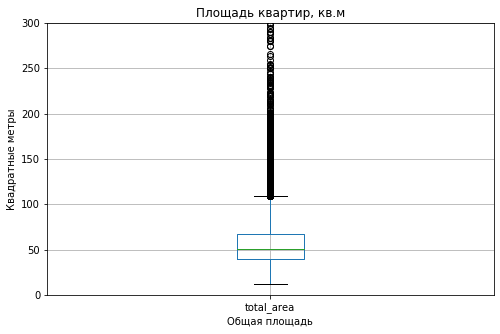

In [73]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.ylim(0, 300)
visual_data.boxplot('total_area')
ax.set_xlabel('Общая площадь')
ax.set_ylabel('Квадратные метры')
ax.set_title('Площадь квартир, кв.м')
plt.show()

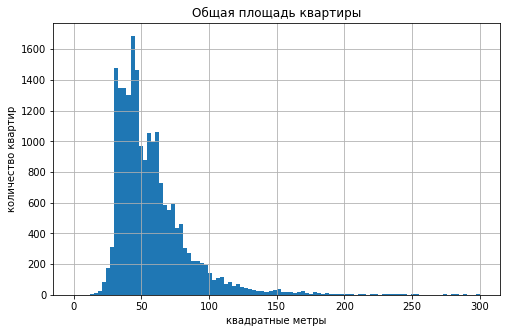

In [74]:
visual_data.hist('total_area', range=(0,300), bins=100)
plt.title('Общая площадь квартиры')
plt.ylabel('количество квартир')
plt.xlabel('квадратные метры')
plt.show()

Гистограмма и ящик для **цен на квартиры**.<br/>

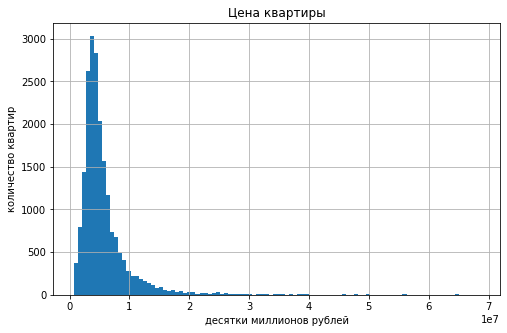

In [75]:
visual_data.hist('last_price', bins=100)
plt.title('Цена квартиры')
plt.ylabel('количество квартир')
plt.xlabel('десятки миллионов рублей')
plt.show()

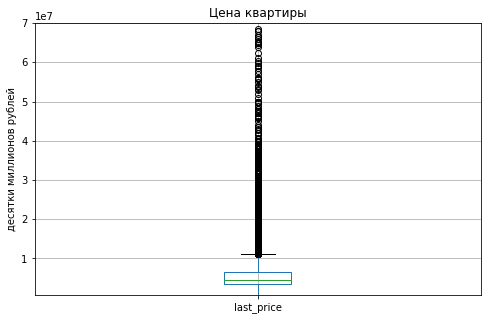

In [76]:
visual_data.boxplot('last_price').set_title('Цена квартиры')
plt.ylim(700000,70000000)
plt.ylabel('десятки миллионов рублей')
plt.show()

Стоимость квартиры чаще всего находится в промежутке от 2млн.рублей до 8млн.рублей.

Самое простое, графики для **количества комнат**:

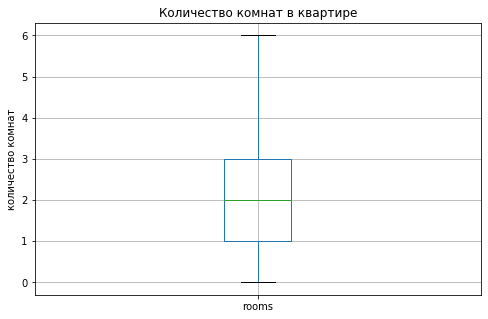

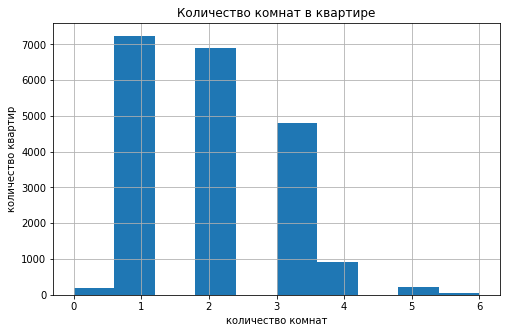

In [77]:
visual_data.boxplot('rooms').set_title('Количество комнат в квартире')
plt.ylabel('количество комнат')

visual_data.hist('rooms')
plt.title('Количество комнат в квартире')
plt.ylabel('количество квартир')
plt.xlabel('количество комнат')
plt.show()

- Удивительно, но однокомнатных и двухкомнатных квартир в нашей выборке практически одинаковое количество. 
- На третьем месте 'трёшки', но отставание тоже невелико.
- Резкая просадка графиков по квартирам включающим в себя 4 комнаты или более.

**Высота потолков** не должна удивить:

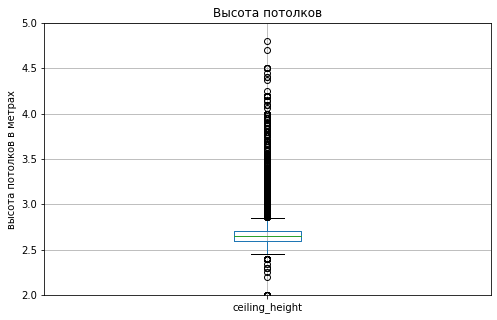

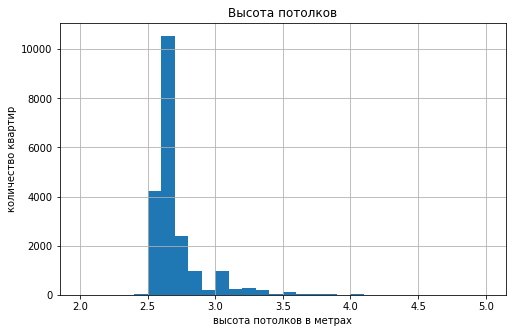

In [78]:
visual_data.boxplot('ceiling_height').set_title('Высота потолков')
plt.ylim(2, 5)
plt.ylabel('высота потолков в метрах')
visual_data.hist('ceiling_height', range=(2,5), bins=30)
plt.title('Высота потолков')
plt.ylabel('количество квартир')
plt.xlabel('высота потолков в метрах')
plt.show()

Ничего удивительного, средняя высота потолка около 2.5 - 2.7 метра.

Гистограмма и ящик с усами для **времени продажи квартир**:

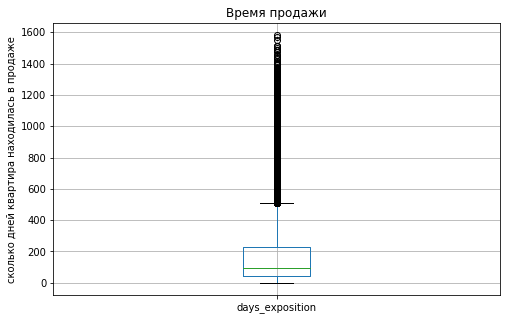

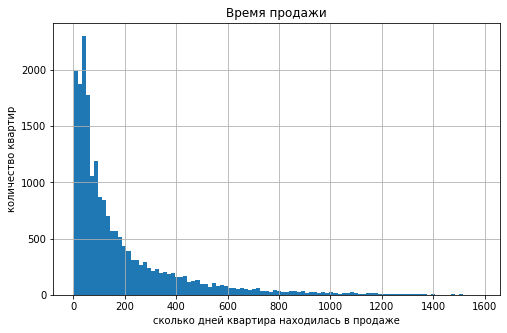

count    20331.000000
mean       180.281737
std        219.204078
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [79]:
visual_data.boxplot('days_exposition').set_title('Время продажи')
plt.ylabel('сколько дней квартира находилась в продаже')

visual_data.hist('days_exposition', bins=100)
plt.title('Время продажи')
plt.ylabel('количество квартир')
plt.xlabel('сколько дней квартира находилась в продаже')
plt.show()

visual_data['days_exposition'].describe()

Дополнительно. 
Попробуем сравнить с общими показателями, среднее значение тех строк, где отсутствует количество дней публикации.<br/>
Максимальная дата публикации, вероятно, является днем прекращения наблюдений (сбора данных в датасет).

In [80]:
data['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

Средняя дата в строках с отсутствующими значениями в колонке days_exposition:

In [81]:
data[data['days_exposition'].isnull()]['first_day_exposition'].mean()

Timestamp('2018-09-27 08:36:58.170386688')

В итоге имеем следующее среднее предполагаемое кол-во дней публикации:

In [82]:
data['first_day_exposition'].max() - data[data['days_exposition'].isnull()]['first_day_exposition'].mean()

Timedelta('217 days 15:23:01.829613')

Можно сделать следующие выводы:
- Средний показатель существенно больше медианного, почти вдвое;
- Обычно продажа занимает около 100 дней;
- Если продажа произошла менее чем за 45 дней - можно утверждать, что продажа прошла очень быстро;
- Очень быстрые продажи не являются редкостью, если вы продешевили - вашу квартиру быстро купит посредник;
- Если продажа прошла более чем за 232 дней, то продажа заняла очень много времени.
- 217 дней - средний показатель по значениям, в которых не указано количество дней публикации. И этот показатель находится внутри установленной нами границы "нормального" времени продажи [45, 232]. Информация нуждается в дополнительной проверке. Но в любом случае, подставлять пропущенные значения рано, ведь нас интересует количество дней, за которое квартира **будет продана**. А эти квартиры были не проданы на момент выгрузки датасета, при условии верности нашего предположения.

#### Сводные графики. Определение созависимости.

##### Зависимость стоимости квартиры от её площади:

In [83]:
visual_data['last_price'].corr(visual_data['total_area'])

0.7609468720990348

Высокая степень корреляции - 0,76.

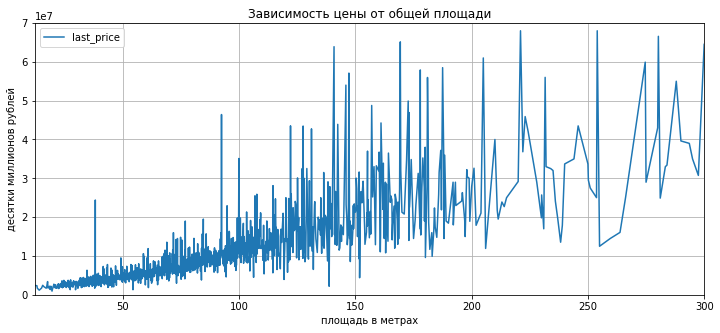

In [84]:
(visual_data
 .pivot_table(index='total_area', values='last_price')
 .plot(grid=True,ylim=(0, 70000000), figsize=(12,5))
).set_title('Зависимость цены от общей площади')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('площадь в метрах')
plt.show()

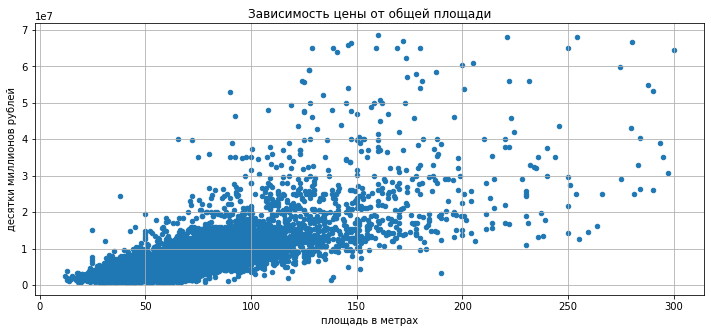

In [85]:
(visual_data
 .plot(x='total_area', y='last_price', kind='scatter', figsize=(12, 5), sharex=False, grid=True)
).set_title('Зависимость цены от общей площади')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('площадь в метрах')
plt.show()

Наблюдаем стабильное увеличение цены при увеличении площади, где-то до показателя в 150кв.м.

После отметки в 150кв.м. зависимость пропадает.




<div class="alert alert-success">
<h2> Комментарий от ревьюера</h2>

Ты отлично поясняешь полученные коэффициенты корреляции. Для таких исследований лучше выбирать тип графика - диграмма рассеяния.

</div>

<div class="alert alert-success">
<h2> Комментарий от ревьюера v2</h2>

Отлично.

</div>

##### Зависимость стоимости квартиры от количества комнат:

In [86]:
visual_data['last_price'].corr(visual_data['rooms'])

0.46376173072748605

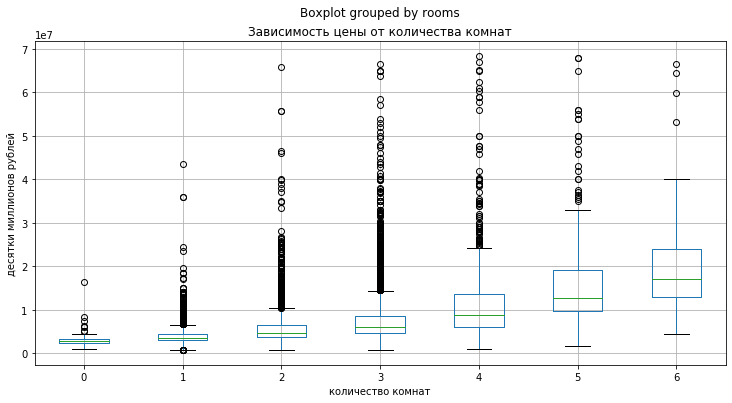

In [87]:
(visual_data
 .boxplot('last_price', by='rooms', figsize=(12,6))).set_title('Зависимость цены от количества комнат')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('количество комнат')
plt.show()

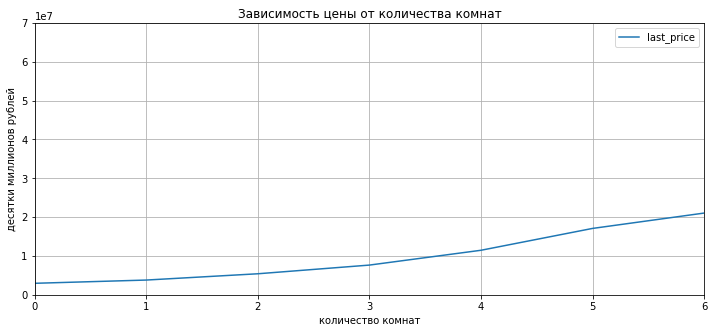

In [88]:
(visual_data
 .pivot_table(index='rooms', values='last_price')
 .plot(grid=True,ylim=(0, 70000000), figsize=(12,5))
).set_title('Зависимость цены от количества комнат')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('количество комнат')
plt.show()

На графиках видим, что цена зависит от количества комнат.<br/> 
Но всё же, скорее всего, эта зависимость косвенная.<br/> 
Является следствием увеличения общей площади.

##### Зависимость стоимости квартиры от удаленности от центра:

In [89]:
visual_data['last_price'].corr(visual_data['cityCenters_nearest_km'])

-0.31266119649964697

Обратная корреляция, с увеличением расстояния - снижается цена, логично.

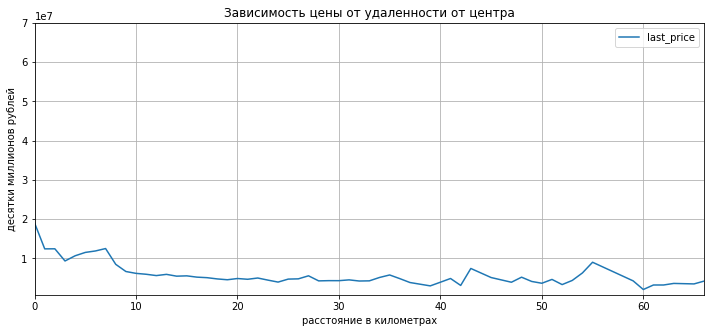

In [90]:
(visual_data
 .pivot_table(index='cityCenters_nearest_km', values='last_price')
 .plot(grid=True,ylim=(700000, 70000000), figsize=(12,5))
).set_title('Зависимость цены от удаленности от центра')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('расстояние в километрах')
plt.show()

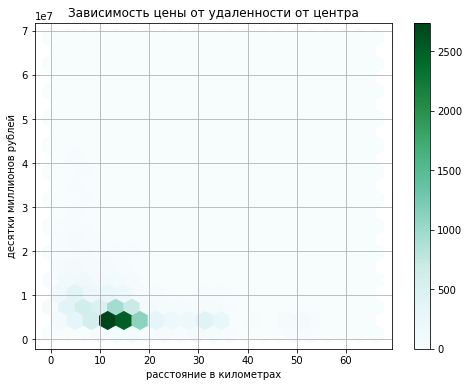

In [91]:
(visual_data
 .plot(x='cityCenters_nearest_km', y='last_price', kind='hexbin',gridsize=20, figsize=(8, 6), sharex=False, grid=True)
).set_title('Зависимость цены от удаленности от центра')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('расстояние в километрах')
plt.show()

##### Зависимость цены от этажа (первый/последний/другой):

Первые этажи мало кто любит, последние этажи - уже лучше, ну и всем нравятся "другие".

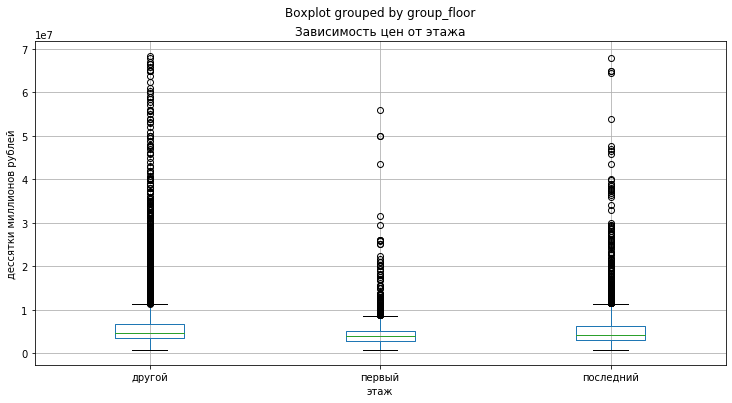

In [92]:
(visual_data
 .boxplot('last_price', by='group_floor', figsize=(12,6))).set_title('Зависимость цен от этажа')
plt.ylabel('дессятки миллионов рублей')
plt.xlabel('этаж')
plt.show()

##### Зависимость цены от дня недели:

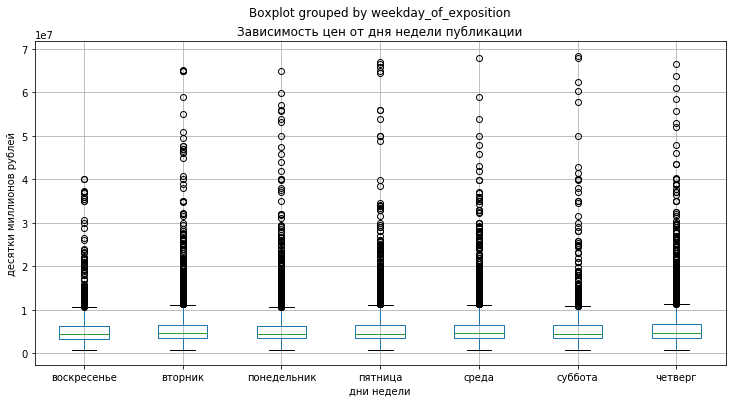

In [93]:
(visual_data
 .boxplot('last_price', by='weekday_of_exposition', figsize=(12,6))).set_title('Зависимость цен от дня недели публикации')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('дни недели')
plt.show()


##### Зависимость цены от месяца:

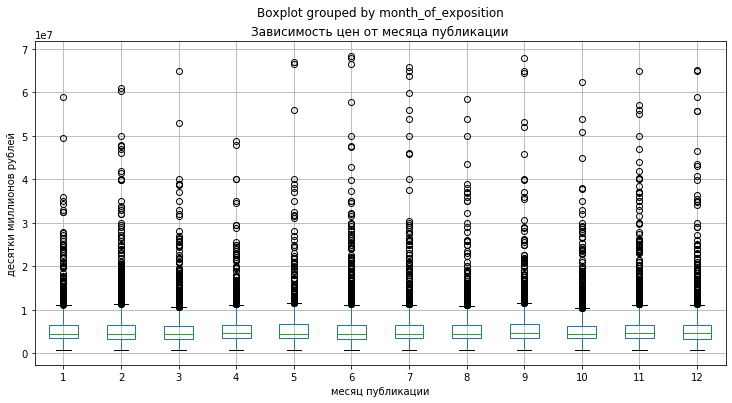

In [94]:
visual_data.boxplot('last_price', by='month_of_exposition', figsize=(12,6)).set_title('Зависимость цен от месяца публикации')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('месяц публикации')
plt.show()

##### Зависимость цены от года:

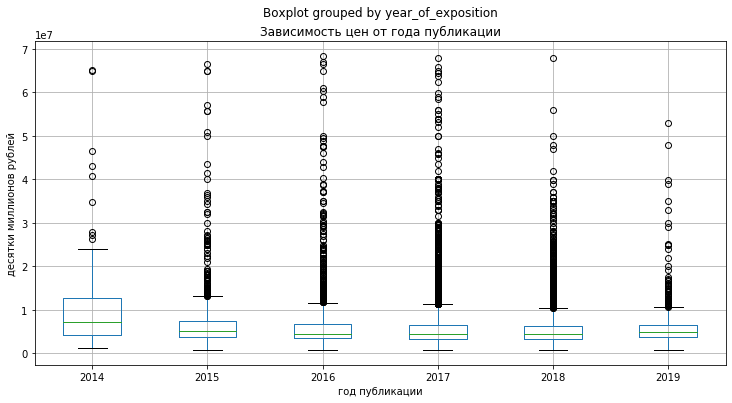

In [95]:
visual_data.boxplot('last_price', by='year_of_exposition', figsize=(12,6)).set_title('Зависимость цен от года публикации')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('год публикации')
plt.show()

Существенной зависимости от дня недели или месяца - не обнаружено.
Цены на квартиры плавно снижались до 2017 года, но после этого начали расти.

##### Изучение квартир в центре.

Посмотрим медианные показатели цен по километрам:

In [96]:
visual_data.groupby('cityCenters_nearest_km')['price_one_square_meter'].median().head(20)

cityCenters_nearest_km
0.0     139319.0
1.0     122449.0
2.0     117949.0
3.0     104603.0
4.0     114114.0
5.0     126064.5
6.0     125853.0
7.0     122822.0
8.0     120831.0
9.0     104328.0
10.0    105607.0
11.0    102241.0
12.0    102419.0
13.0    103084.0
14.0    101030.0
15.0    100000.0
16.0     96721.0
17.0     93264.0
18.0     90909.0
19.0     96238.0
Name: price_one_square_meter, dtype: float64

In [97]:
central_data = visual_data.query('cityCenters_nearest_km <= 2')
central_data

,locality_name,lemmas_string,last_price,rooms,total_area,living_area,kitchen_area,ceiling_height,floor,floors_total,...,days_exposition,first_day_exposition,price_one_square_meter,weekday_of_exposition,month_of_exposition,year_of_exposition,living_of_the_total,kitchen_of_the_total,cityCenters_nearest_km,group_floor
24,Санкт-Петербург,санкт-петербург\n,6500000,2,97.2,46.500000,19.600000,2.65,1,3,...,265,2015-10-31,66872,суббота,10,2015,0.478395,0.201646,2.0,первый
213,Санкт-Петербург,санкт-петербург\n,8700000,4,111.4,73.200000,14.100000,3.10,2,4,...,791,2016-10-10,78097,понедельник,10,2016,0.657092,0.126571,1.0,другой
239,Санкт-Петербург,санкт-петербург\n,22000000,3,119.0,56.000000,35.000000,3.50,3,5,...,77,2017-02-16,184874,четверг,2,2017,0.470588,0.294118,2.0,другой
282,Санкт-Петербург,санкт-петербург\n,37000000,2,115.0,65.000000,14.000000,2.65,2,5,...,158,2018-11-15,321739,четверг,11,2018,0.565217,0.121739,2.0,другой
330,Санкт-Петербург,санкт-петербург\n,7100000,3,50.0,31.500000,5.000000,2.65,1,5,...,900,2016-04-20,142000,среда,4,2016,0.630000,0.100000,2.0,первый
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23382,Санкт-Петербург,санкт-петербург\n,15000000,4,150.9,98.200000,23.900000,3.67,3,4,...,455,2016-07-04,99404,понедельник,7,2016,0.650762,0.158383,2.0,другой
23395,Санкт-Петербург,санкт-петербург\n,40000000,6,188.0,109.510000,31.300000,2.65,4,6,...,30,2017-05-29,212766,понедельник,5,2017,0.582500,0.166489,2.0,другой
23399,Санкт-Петербург,санкт-петербург\n,15300000,3,97.0,61.400000,9.500000,3.50,2,7,...,391,2017-01-11,157732,среда,1,2017,0.632990,0.097938,1.0,другой
23602,Санкт-Петербург,санкт-петербург\n,8700000,3,73.0,41.227883,13.676896,2.65,4,4,...,34,2019-01-23,119178,среда,1,2019,0.564766,0.187355,2.0,последний


In [98]:
def comparative_table(data, row, table_name, x_name, y_name):
    data.boxplot(row)
    plt.title(table_name)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.show()

Цены в радиусе двух километров от центра существенно выше, но и предложений очень мало, всего 411.

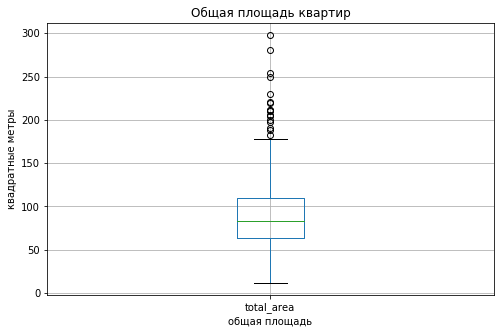

In [99]:
comparative_table(central_data, 'total_area', 'Общая площадь квартир', 'общая площадь', 'квадратные метры')

In [100]:
central_data['total_area'].describe()

count    411.000000
mean      91.417080
std       42.122884
min       12.000000
25%       63.300000
50%       83.000000
75%      110.000000
max      297.500000
Name: total_area, dtype: float64

Средняя площадь квартир в центре существенно выше.<br/>
Более 80кв.м. в центре, при 50кв.м. по всей таблице.

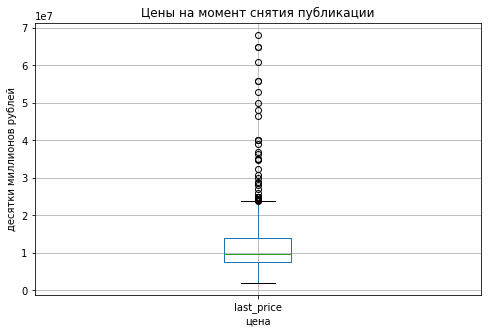

In [101]:
comparative_table(central_data, 'last_price', 'Цены на момент снятия публикации', 'цена', 'десятки миллионов рублей')

In [102]:
central_data['last_price'].describe()

count    4.110000e+02
mean     1.269404e+07
std      9.669411e+06
min      2.100000e+06
25%      7.489500e+06
50%      9.600000e+06
75%      1.400000e+07
max      6.800000e+07
Name: last_price, dtype: float64

Средняя цена квартир более 12млн, что так же значительно выше среднего показателя по городу(6,5млн).

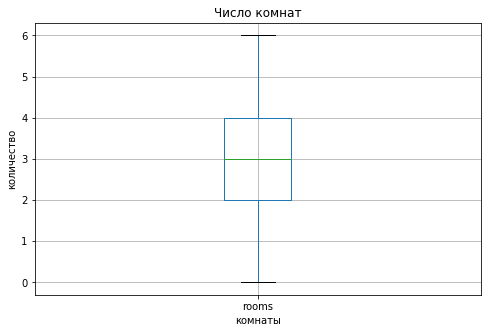

In [103]:
comparative_table(central_data, 'rooms', 'Число комнат', 'комнаты', 'количество')

Медианный показатель числа комнат в центре - 3, по городу - 2.

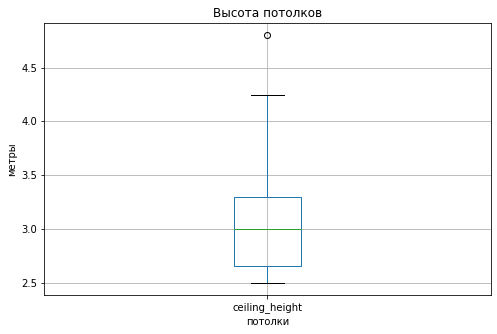

In [104]:
comparative_table(central_data, 'ceiling_height', 'Высота потолков', 'потолки', 'метры')

Средняя высота потолков так же выше, около 3метров.

##### Зависимости.

Цена от площади:

In [105]:
central_data['last_price'].corr(central_data['total_area'])

0.6057563337247991

Степень корреляции немного ниже, 0.6 в центре, тогда как по всем предложениям - 0.65.
Цена не так сильно зависит от площади, это интересно.

Цена от количества комнат:

In [106]:
central_data['last_price'].corr(central_data['rooms'])

0.3236826656328284

Здесь степень корреляции так же немного ниже, по объявлениям в центре 0.32, а всем - 0.36.

Цена от этажа:

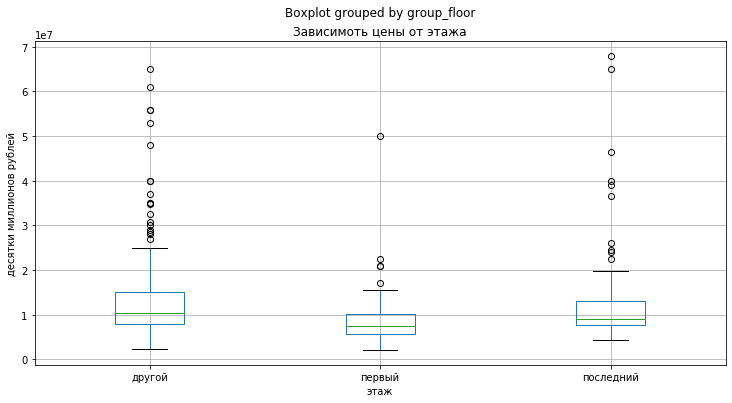

In [107]:
central_data.boxplot('last_price', by='group_floor', figsize=(12,6))
plt.title('Зависимоть цены от этажа')
plt.ylabel('десятки миллионов рублей')
plt.xlabel('этаж')
plt.show()


Ситуация схожая с общими показателями.

##### Топ населенных пунктов

In [108]:
visual_data['lemmas_string'].value_counts().sort_values(ascending=False).head(10)

санкт-петербург\n    13515
 муриный\n             551
 шушар\n               408
всеволожск\n           339
колпино\n              307
пушкин\n               305
 парголовый\n          301
 кудрово\n             299
гатчина\n              268
выборг\n               207
Name: lemmas_string, dtype: int64

In [109]:
top_locations = [
    'санкт-петербург\n', ' муриный\n', ' шушар\n', 'всеволожск\n', 
    'пушкин\n', 'колпино\n', ' парголовый\n', 'гатчина\n', ' кудрово\n', 'выборг\n']

Узнаем среднюю цену квадратного метра в топовых населённых пунктах:

In [110]:
(visual_data
.query('lemmas_string in @top_locations')
.groupby('lemmas_string')['price_one_square_meter'].mean().sort_values(ascending=False)
)

lemmas_string
санкт-петербург\n    110626.316241
пушкин\n             102073.796721
 кудрово\n            92473.588629
 парголовый\n         89672.129568
 муриный\n            85743.230490
 шушар\n              78010.186275
колпино\n             74763.332248
всеволожск\n          68570.622419
гатчина\n             67928.294776
выборг\n              57269.787440
Name: price_one_square_meter, dtype: float64

Самые дорогие квартиры в самом Санкт-Петербурге, а также в городе Пушкин.
Самые дешевые квартиры из топа - в Выборге.

### Шаг 5. Общий вывод

**Количество комнат.**
Больше всего продается однокомнатных и двухкомнатных квартир, примерно равное количество.<br/>
Доля однокомнатных квартир из всей выборки составила - 34%.<br/>
Доля двухкомнатных квартир составила - 33.5%.<br/>
Доля трехкомнатных квартир составила - 24.5%.<br/>
Четырёхкомнатные и более продаются крайне редко.<br/>
Доля четырехкомнатных квартир из всей выборки составила всего - 5%.<br/>


**Общая площадь**
Квартир площадью менее 30 квадратных метров всего - 3%.<br/>
Значительно больше квартир площадью от 30кв.м. до 40кв.м - 22%.<br/>
Примерно такое же количество квартир 40-50кв.м., их - 23%.<br/>
Чуть меньше квартир, площадь каторых составила 50-60кв.м - 17%.<br/>
Далее процент снижается: <br/>
60-70кв.м - 12% <br/>
70-80кв.м - 8% <br/>
80-90кв.м - 5% <br/>
90-100кв.м - 3% <br/>


Самая популярная площадь квартир около 50-ти квадратных метров, по всей выборке.<br/>
Квартиры площадью в 25кв.м. и меньше можно встретить так же редко, как квартиры с площадью в 100 кв.м.<br/>
    <br/>

На стоимость квартиры больше всего влияет её расположение и общая площадь.<br/>
Стоимость квартиры чаще всего находится в промежутке от 2млн.рублей до 8млн.рублей, что составляет 80% всех объявлений.<br/>
Цена на квартиры на первом этаже ниже прочих, дороже - квартиры на верхних этажах, самые дорогие - не первый, не последний.<br/>
Цены на квартиры плавно снижались до 2017 года, но после этого начали расти.    <br/>
В меньшей степени на цену влияет день недели и месяц, когда было выставлено объявление о продаже.<br/>
<br/>
Обычно время продажи квартиры составляет около 100 дней.<br/>
Нормальным показателем является продажа в промежутке от 45 дней до 232 дней.<br/>

Квартиры в центре:
- существенно больше, средний показатель - 83кв.м. (50кв.м. по всей таблице)
- существенно дороже, средний показатель - 12,7млн.р. (6.5млн.р по всей таблице)
- количество комнат в квартирах в центре в среднем больше - 3 (2 по всей таблице)
- потолки в центре выше - 3м (2.65м по всей таблице)


Самая дорогая недвижимость в городах Санкт-Петербург и Пушкин.<br/>
Самые дешевые квартиры из топ-10 населенных пунктов датасета - в Выборге.